In [6]:
import numpy as np
import matplotlib.pyplot as plt

### defining the configs

In [3]:
# # --- Radar Hardware & Waveform ---
# C = 3e8                      # Speed of light (m/s)
# FC = 10e9                    # 10 GHz (X-band)
# LAMBDA = C / FC              # Wavelength (0.03 meters)
# B = 150e6                    # Bandwidth (150 MHz)
# TC = 2e-3                    # Chirp time (2ms)
# SLOPE = B / TC               # Chirp slope (Hz/s)

# # --- Sampling & Resolution ---
# FS = 2.5e6                   # Sampling rate (2.5 MHz)
# N_SAMPLES = int(FS * TC)     # Number of samples per chirp (5000 samples)
# R_MAX = 150000               # Max range (150 KM)
# RANGE_RES = C / (2 * B)      # Range resolution (1.0 meter)

# # --- Target Specs ---
# MIN_RCS = 0.01               # Stealth target RCS (m^2)
# BOLTZMANN = 1.38e-23         # Boltzmann constant

### the math

the chirp signal equation:
$$s(t) = A \cos(2\pi (f_c t + \frac{1}{2} K t^2))$$
and
$$K = \frac{B}{T_c}$$
$B = f_1 - f_0$ and defined in the configs as:
$$B = 150e6$$
so the final equation:
$$s(t) = A \cos(2\pi (f_c t + \frac{B}{2T_c} t^2))$$

then we use the already defined configs:
$$B = 150e6 \quad F_C = 10e9 \quad T_C = 2e-3$$



### math implementation

In [4]:
B = 150e6
TC = 2e-3
FC = 10e9
FS = 2.5e6
N_SAMPLES = int(FS * TC)

# define the t as an array
t = np.linspace(0,TC,N_SAMPLES)

signal = np.cos(2 * np.pi * ((FC * t) + ((B * t**2) / (2 * TC))))

### plotting

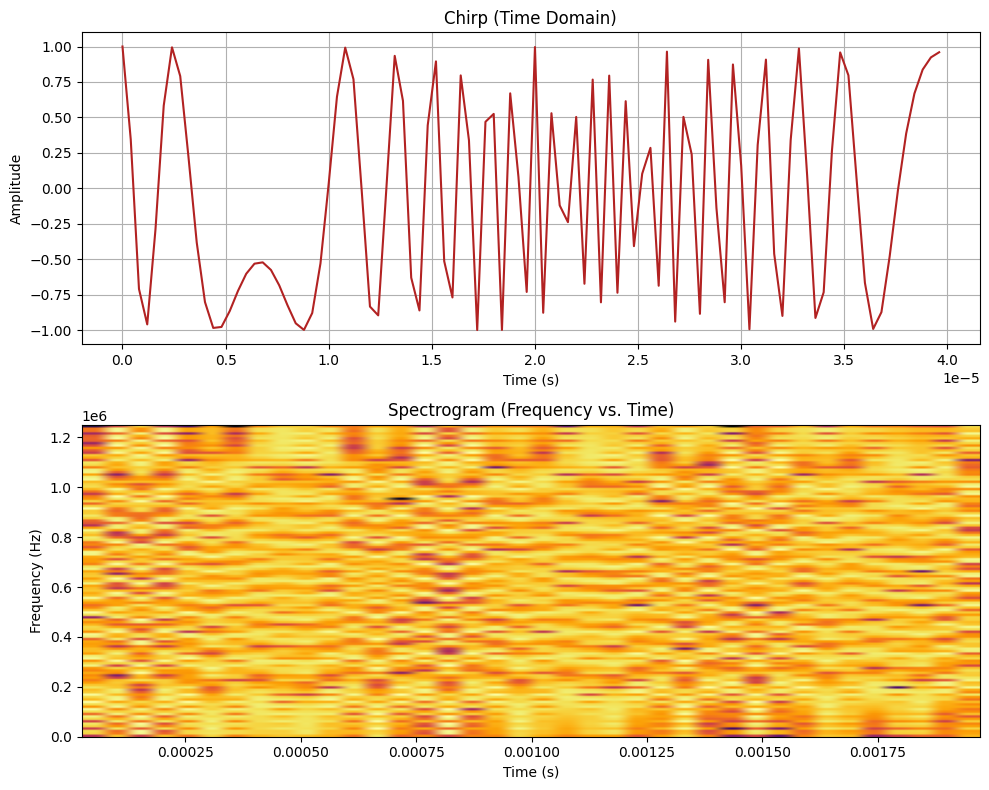

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 1. Time Domain (The Waveform)
ax1.set_title("Chirp (Time Domain)")
ax1.plot(t[:100], signal[:100], color='firebrick') # Zoom in on first 100 samples
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)

# 2. Frequency Domain (Spectrogram)
# This proves the frequency is actually climbing over time
ax2.set_title("Spectrogram (Frequency vs. Time)")
ax2.specgram(signal, Fs=FS, cmap='inferno')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()